# <font color="lightblue"> Prática 02: Algoritmo k-NN </font>

Aluna: Kamily Assis de Oliveira

**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.
*   Apresentar as funções do Scikit-Learn que lidam com o k-NN.



**Descrição:**

Implemente duas versões de um classificador que usa o algoritmo k-NN para identificar dígitos escritos à mão a partir de um conjunto de imagens e compare os tempoa de execução. Na primeira versão, você deverá implementar o algoritmo k-NN conforme visto em sala de aula. Na segunda, você deverá usar a algoritmo k-NN da biblioteca Scikit-Learn. O conjunto de imagens a ser utilizado consiste no dataset <i> Digits </i> da biblioteca Scikit-Learn.

# <font color="lightblue"> Solução </font>

### Descrição do Dataset

In [40]:
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Exploração do Dataset

In [41]:
print(digits.target[12])
print(digits.data.shape)
print(type(digits.data))
print(digits.images[10])

2
(1797, 64)
<class 'numpy.ndarray'>
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


In [42]:
x, y = digits.data, digits.target

num_amostras = x.shape[0]
num_amostras

1797

### Exibição das imagens

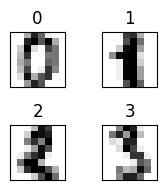

In [43]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

# usado para um numero nao ficar em cima do outro
plt.tight_layout()

### Implementação da Versão 1 do classificador
Divida os dados em dois conjuntos, de treino e teste, implemente o Algoritmo k-NN conforme discutido em sala de aula e exiba a acurácia da classificação e o tempo de execução.

Passos:

1 - Pegar o dataset de treinamento

2- escolher um K (preferencialmente ímpar)

3 - pegar o dado teste (um novo ponto)

4 - calcular a distancia euclidiana

5 - selecionar os k-vizinhos mais próximos

6 - classificar

In [44]:
import numpy as np
import time
from scipy.spatial import distance
from collections import Counter

In [45]:
#@title Separando treino e teste

#embaralhando o conjunto de indices
indices = np.arange(num_amostras)
np.random.shuffle(indices)


#treino e teste (treino 70% teste 30%)
tam_treino = int(num_amostras * 0.7)
ind_treino = indices[:tam_treino]
ind_teste = indices[tam_treino:]


#separando as info
treino = x[ind_treino]
teste = x[ind_teste]
rotulos_treino = y[ind_treino]
rotulos_teste = y[ind_teste]

print(f'Tamanho do conjunto de treino: {treino.shape[0]}')
print(f'Tamanho do conjunto de teste: {teste.shape[0]}')


Tamanho do conjunto de treino: 1257
Tamanho do conjunto de teste: 540


In [46]:
def distancia_euclidiana(a, b):
  return np.sqrt(np.sum((a - b)**2))

In [47]:
#R-64 / cada pixel faz parte da cordenada - (x1, x2, ..., x64)

#função knn
def knn(teste, treino, rotulos_treino, k=3):

  previsoes = []

  for t in teste:

    distancia_tupla = []
    #distancia euclidiana entre os elementos
    for tr in treino:

      distancias = distancia_euclidiana(t, tr)
      distancia_tupla.append(distancias)

    #os mais proximos (usando k para ficar generico, mas nesse caso é 3)
    vizinhos_prox = np.argsort(distancia_tupla)[:k]

    #os mais comuns
    vizinhos_comum = []

    for i in vizinhos_prox:
      vizinhos = rotulos_treino[i]
      vizinhos_comum.append(vizinhos)

    contador = Counter(vizinhos_comum)

    mais_comum, contagem = contador.most_common(1)[0]

    previsoes.append(mais_comum)

  return previsoes

In [48]:
inicio = time.time()

#previsoes
previsoes = knn(teste, treino, rotulos_treino) #mantendo k=3 mesmo

#acuracia
acertos = 0
erros = 0

for predicao, real in zip(previsoes, rotulos_teste):
  if predicao == real:
    acertos += 1
  else:
    erros += 1

acuracia = acertos/len(rotulos_teste)*100
print(f"Acurácia: {acuracia:.2f}%")

fim = time.time()

#execução
tempo_execucao = fim - inicio
print(f"Tempo de execução: {tempo_execucao:.2f} segundos")

Acurácia: 98.70%
Tempo de execução: 5.36 segundos


### Implementação da Versão 2 do classificador
Utilize a função train_test_split() da bibioteca Scikit-Learn para separar os dados em treino e teste e o classificador k-NN da própria biblioteca para identificação dos dígitos. Ao final, exiba a classificação e o tempo de execução.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [52]:
treino, teste, rotulos_treino, rotulos_teste = train_test_split(
    x, y, test_size=0.3, random_state=0
    )

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(treino, rotulos_treino)

inicio = time.time()
predictions = knn.predict(teste)
fim = time.time()

accuracy = accuracy_score(rotulos_teste, predictions)


tempo_execucao = fim - inicio
print(f"Acurácia: {accuracy*100:.2f}%")
print(f"Tempo de execução: {tempo_execucao:.2f} segundos")

Acurácia: 98.70%
Tempo de execução: 0.21 segundos
